In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *

def gauss_func(p,x):
    xc=x-p[2]
    sig2=p[3]**2
    return p[0]+p[1]*np.exp(-0.5*xc**2/sig2)

model=Model(gauss_func)

data=RealData(x,y,sy=yerr)

odr=ODR(data,model,beta0=[1000.,1000.,2,1])
out=odr.run()
out.pprint()

NameError: name 'x' is not defined

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *

def ellipse_func(p,x):
    t=p[0]+x[0]**2+p[1]*x[1]**2+ \
        p[2]*x[0]*x[1]+p[3]*x[0]
    return t

data=Data(np.row.stack.([x,y]),y=1)
model=Model(ellipse_func, implicit=True
odr=ODR(data,model,beta0=[1,1,1,1,1,1],maxit=100)
out=odr.run()
out.pprint()
print(out.beta)

SyntaxError: invalid syntax (<ipython-input-2-b52e541a6371>, line 10)

In [6]:
np.random.rand(10)

array([0.26094164, 0.57134498, 0.70885721, 0.96962219, 0.62750961,
       0.63578995, 0.2199117 , 0.87039562, 0.55506833, 0.36660177])

In [8]:
np.random.seed(1)
np.random.rand(10)

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, 3.02332573e-01,
       1.46755891e-01, 9.23385948e-02, 1.86260211e-01, 3.45560727e-01,
       3.96767474e-01, 5.38816734e-01])

In [9]:
np.random.seed(1)
np.random.rand(10)
#시드를 주면 할 때마다 같은 값이 반복된다

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, 3.02332573e-01,
       1.46755891e-01, 9.23385948e-02, 1.86260211e-01, 3.45560727e-01,
       3.96767474e-01, 5.38816734e-01])

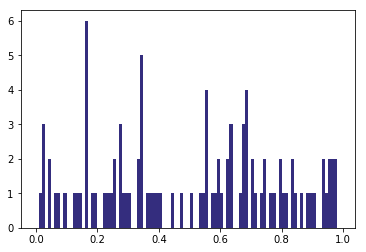

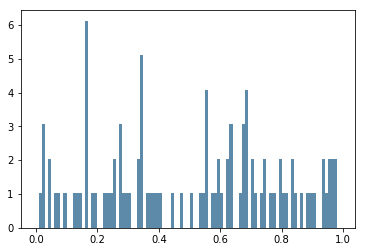

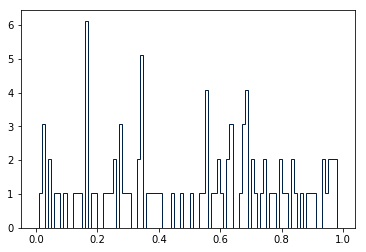

In [35]:
import numpy as np
import matplotlib.pyplot as plt
data = np.random.rand(100) #이 숫자가 커질수록 분포가 균일해진다
bins = np.arange(0., 1., 0.01)

# plot the frequencies

plt.hist(data,bins,color='#342D7E')
plt.show()

# plot the probability density function 

plt.hist(data, bins,normed=1, color='#5d8aa8') 
plt.show()

# plot unfilled, stepped lines rather than filled bars 

plt.hist(data,bins,normed=1,histtype='step',color='#002147')
plt.show()

In [27]:
#MC calculation of pi

N=10000000
x=np.random.rand(N) 
y=np.random.rand(N)

num=0

for i in np.arange(0,N):
    r=x[i]**2+y[i]**2
    if r<=1:
        num+=1
pi=4*num/N
print(pi)

3.141508


 ### 여기서부터는 혼자 하는 복습

In [1]:
#exercise 3 - not completed
import numpy as np
import matplotlib.pyplot as plt

def xf(N,n):
    np.random.seed(n)
    xf=0
    for i in (0,N-1):
        x=np.random.rand(1)
        if x>=0.5:
            xf+=1
        else:
            xf-=1
    return xf

In [7]:
X=[]
J=[]
C=[]
for i in np.arange(0,10**3):
    X.append(xf(10**4,i))
for i in np.arange(i,10**1):
    j=2**i-10**1
    c=X.count(j)
    print(j,c)

In [13]:
#exercise 4

a,b=0,1

for i in range(2,6):
    N=10**i
    I=0
    for j in range(N):
        x=np.random.rand(1)
        I+=np.exp(x)
    I*=(b-a)/N
    print(N,I)

100 [1.76072536]
1000 [1.7178496]
10000 [1.72049974]
100000 [1.71910952]


In [16]:
#exercise 5
a,b=0,1.5
def func(x):
    X=np.sqrt(1+2*x)
    Y=np.exp(X-1)/X
    return Y

for i in range(2,6):
    N=10**i
    I=0
    for j in range(N):
        x=1.5*np.random.rand(1)
        I+=func(x)
    I*=(b-a)/N
    print(N,I)

100 [1.72699031]
1000 [1.7234234]
10000 [1.7200183]
100000 [1.71810439]


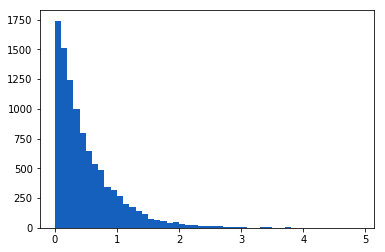

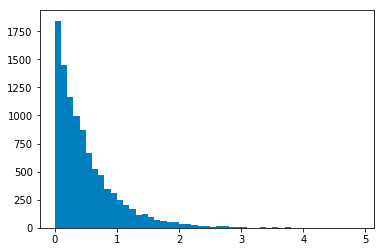

In [36]:
#exercise 6
l=2
x=np.random.rand(10**4)
data =-np.log(x)/l
bins=np.arange(0,5,0.1)
y=-np.log(x1)/l
data2=np.random.exponential(1/l,10**4)

plt.hist(data2,bins,color='#1560bd')
plt.show()
plt.hist(data,bins,color='#007fbf')
plt.show()

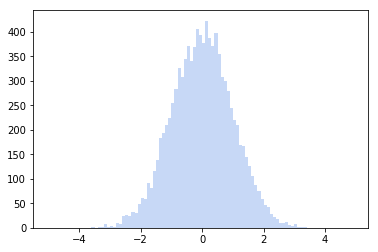

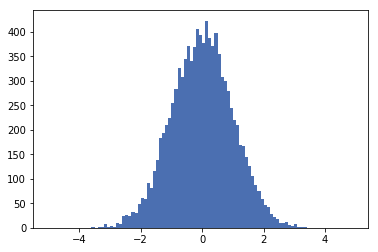

In [43]:
#exercise 7
x1=np.random.rand(10**4)
x2=np.random.rand(10**4)

theta=2*np.pi*x1
R=np.sqrt(-2*np.log(x2))
bins=np.arange(-5,5,0.1)

X=R*np.cos(theta)
data=X
plt.hist(data,bins,color='#c7d8f6')
plt.show()

Y=np.random.normal(loc=0,scale=1,size=10**4)
plt.hist(data,bins,color='#4b6fb1')
plt.show()

In [2]:
from sobol_lib import *

dim_num=1
seed=0

n=10

for i in range (n):
    [r, seed_out]=i4_sobol (dim_num,seed)
    print(r)
    seed=seed_out


[0.]
[0.5]
[0.75]
[0.25]
[0.375]
[0.875]
[0.625]
[0.125]
[0.1875]
[0.6875]


In [3]:
#exercise8
dim_num=1
seed=0
R=[]
for i in (2,6):
    n=10**i
    for i in range (n):
        [r, seed_out]=i4_sobol (dim_num,seed)
        seed=seed_out
        R.append(float(r))
    I=0
    for j in range(n):
        I+=np.exp(R[j])
    I*=(1-0)/n
    print(n,I)

100 1.7081789118573347
1000000 1.7182800292264546
